### Content
Listings, including full descriptions and average review score

Reviews, including unique id for each reviewer and detailed comments

Calendar, including listing id and the price and availability for that day


### Business Question
1. We would like to send an advertisement in a moment that our clients are more likely to rent, close the deal. _Unfortunately, we haven't enough info to work on this question._

2. For us to think about expanding in the Boston area, we need to understand which characteristics our clients prefer in an apartment 

The analyses could be very complex and highly detailed, everything depends on how reliable you want your results. For small analyses, I choose to work with correlations regarding the ''Scores''. 
What made our clients choose the score?
And how the apartment's features are relating, and with particular characteristics are related to the score rating?
I've used some heatmaps to understand this relation, also using changing the correlation mode to Spearman's' correlation.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
calendar= pd.read_csv('calendar.csv')

In [65]:
listings= pd.read_csv('listings.csv')

In [6]:
reviews= pd.read_csv('reviews.csv')

In [99]:
#calendar.head()

In [100]:
#listings.head()

In [67]:
for feature in ["cleaning_fee", "security_deposit", "price"]:
    listings[feature] = listings[feature].map(lambda x: x.replace("$",'').replace(",",''), na_action = 'ignore')
    listings[feature] = listings[feature].astype(float)
    #listings[feature].fillna(listings[feature].median(), inplace = True)


In [36]:
print('\n'.join(listings.columns))

id
listing_url
scrape_id
last_scraped
name
summary
space
description
experiences_offered
neighborhood_overview
notes
transit
access
interaction
house_rules
thumbnail_url
medium_url
picture_url
xl_picture_url
host_id
host_url
host_name
host_since
host_location
host_about
host_response_time
host_response_rate
host_acceptance_rate
host_is_superhost
host_thumbnail_url
host_picture_url
host_neighbourhood
host_listings_count
host_total_listings_count
host_verifications
host_has_profile_pic
host_identity_verified
street
neighbourhood
neighbourhood_cleansed
neighbourhood_group_cleansed
city
state
zipcode
market
smart_location
country_code
country
latitude
longitude
is_location_exact
property_type
room_type
accommodates
bathrooms
bedrooms
beds
bed_type
amenities
square_feet
price
weekly_price
monthly_price
security_deposit
cleaning_fee
guests_included
extra_people
minimum_nights
maximum_nights
calendar_updated
has_availability
availability_30
availability_60
availability_90
availability_365
cal

In [63]:
listings.dropna(axis = 0, subset =['review_scores_rating',
'review_scores_accuracy',
'review_scores_cleanliness',
'review_scores_checkin',
'review_scores_communication',
'review_scores_location',
'review_scores_value'], how = 'all', inplace = True)

In [38]:
listings[['review_scores_rating',
'review_scores_accuracy',
'review_scores_cleanliness',
'review_scores_checkin',
'review_scores_communication',
'review_scores_location',
'review_scores_value']]

,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
1,94.0,10.0,9.0,10.0,10.0,9.0,9.0
2,98.0,10.0,9.0,10.0,10.0,9.0,10.0
3,100.0,10.0,10.0,10.0,10.0,10.0,10.0
4,99.0,10.0,10.0,10.0,10.0,9.0,10.0
5,100.0,10.0,10.0,10.0,10.0,9.0,10.0
...,...,...,...,...,...,...,...
3574,80.0,8.0,8.0,8.0,6.0,10.0,8.0
3575,70.0,8.0,7.0,9.0,10.0,8.0,7.0
3578,100.0,10.0,10.0,10.0,10.0,10.0,10.0
3580,90.0,10.0,10.0,10.0,10.0,8.0,9.0


In [39]:
listings.street.unique()

array(['Pinehurst Street, Boston, MA 02131, United States',
       'Ardale St., Boston, MA 02131, United States',
       'Boston, MA, United States', ...,
       'Broadway, Somerville, MA 02145, United States',
       'A Mount Auburn Street, Cambridge, MA 02138, United States',
       'George St Somerville, Somerville, MA 02145, United States'],
      dtype=object)

In [40]:
listings.city.replace('.*[Jj]amaica [Pp]lain.*', 'Jamaica Plain', inplace=True, regex=True)

In [41]:
listings.city.unique()

array(['Boston', 'Roslindale', 'Roslindale, Boston', 'Jamaica Plain',
       'Brookline', 'Roxbury Crossing', 'Mission Hill, Boston', 'boston',
       'ROXBURY CROSSING', 'South End, Boston', 'Cambridge',
       'East Boston', 'east Boston ', 'Charlestown',
       'Boston (Charlestown)', 'Somerville', 'Brighton', 'Brighton ',
       'Boston ', nan, 'West Roxbury', 'Hyde Park', 'Mattapan', 'Milton',
       'Dorchester', 'dorchester, boston ', 'South Boston', 'Allston',
       'ALLSTON'], dtype=object)

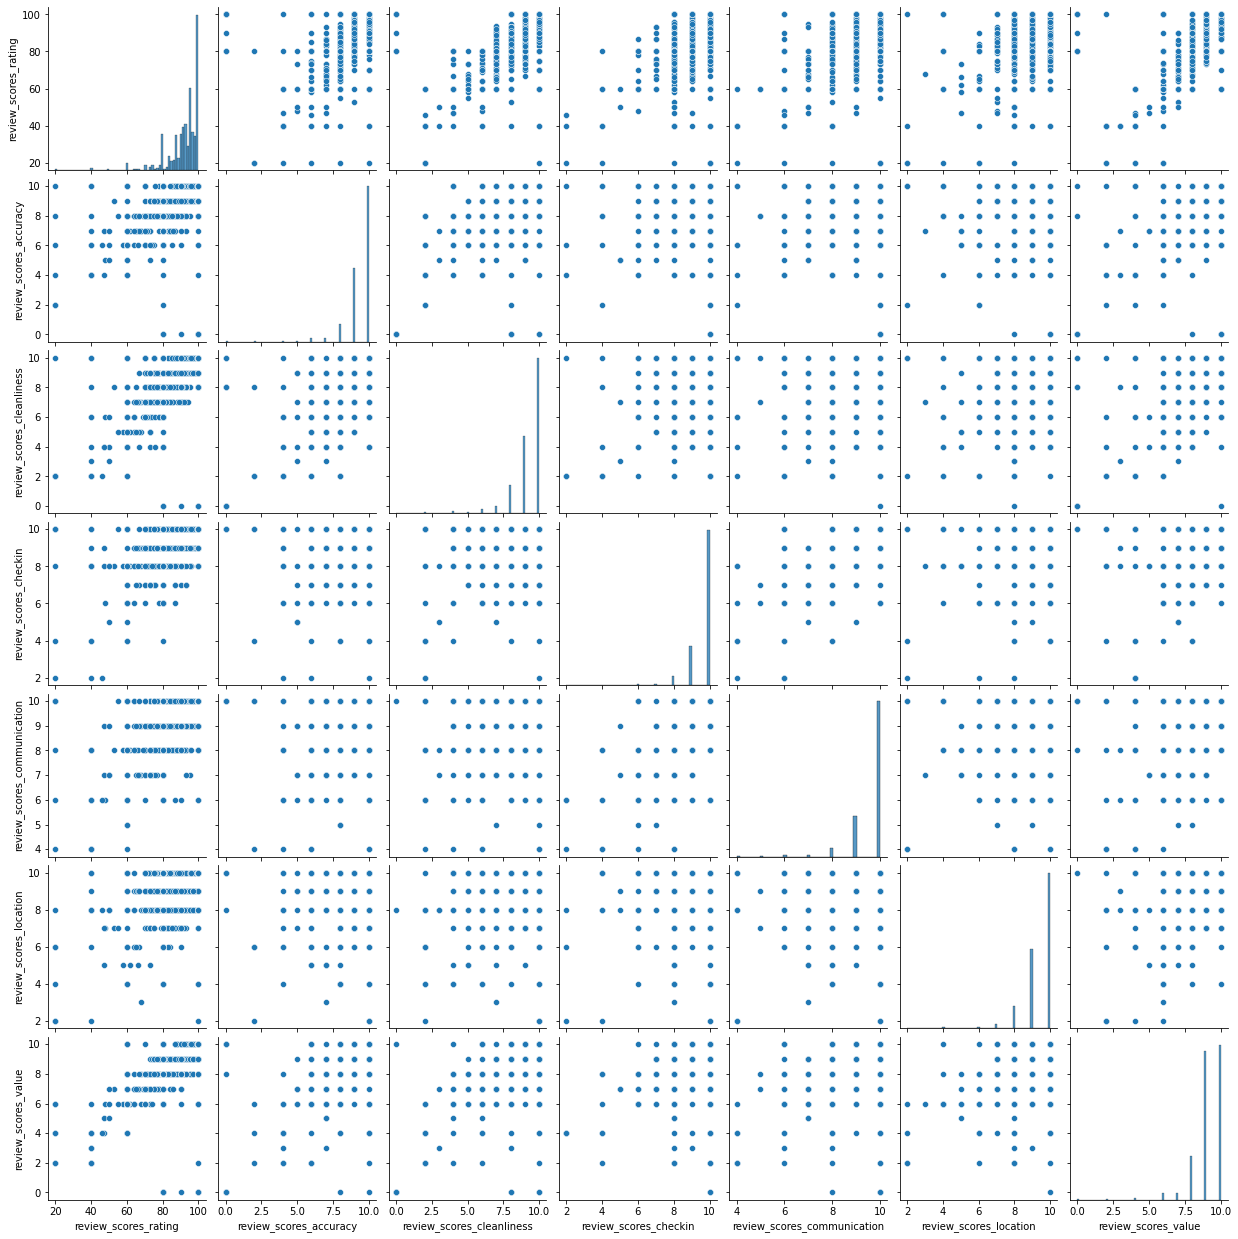

In [42]:
sns.pairplot(listings[['review_scores_rating',
'review_scores_accuracy',
'review_scores_cleanliness',
'review_scores_checkin',
'review_scores_communication',
'review_scores_location',
'review_scores_value']])

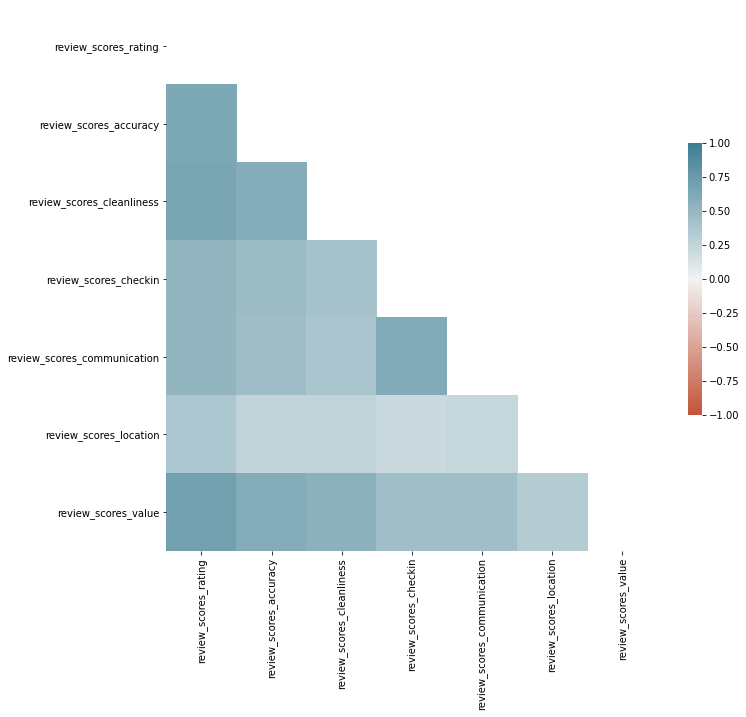

In [70]:
plt.subplots(figsize=(11, 10))
#correlation matrix
corr = listings[['review_scores_rating',
'review_scores_accuracy',
'review_scores_cleanliness',
'review_scores_checkin',
'review_scores_communication',
'review_scores_location',
'review_scores_value']].corr(method= 'spearman')
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, vmin=-1, vmax=1, mask = mask, center=0, cmap=sns.diverging_palette(20, 220, n=200),cbar_kws={"shrink": .5})
sns.axes_style("whitegrid");

### Reading this heat-map we can identify that the location does not affect the overall score, and this is a surprise to me. Based on this graph, we will delve into the features that are most related to review_scores_rating, such as:  Scoring Value, Scoring Cleanliness, and Scoring Accuracy.

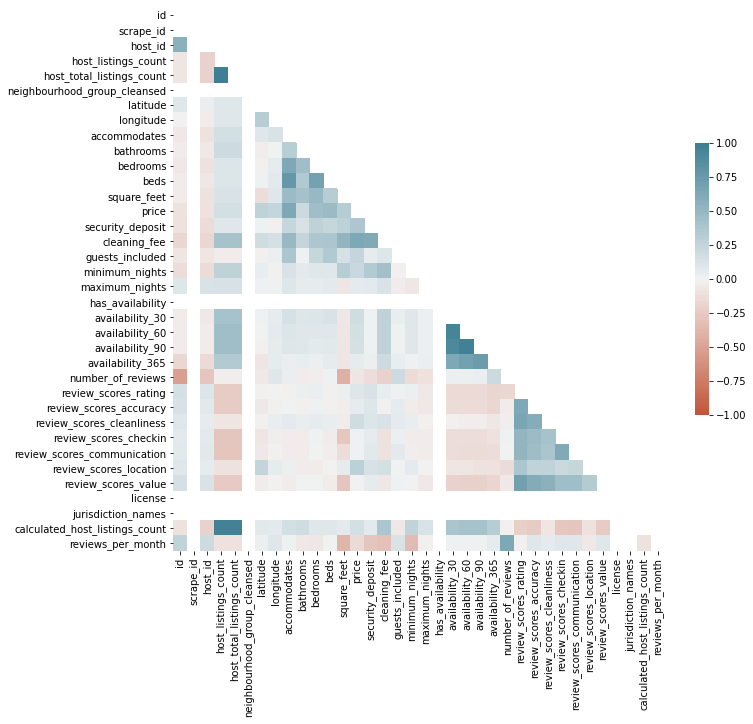

In [69]:
plt.subplots(figsize=(11, 10))
#correlation matrix
corr = listings.corr(method= 'spearman')
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, vmin=-1, vmax=1, mask = mask, center=0, cmap=sns.diverging_palette(20, 220, n=200),cbar_kws={"shrink": .5})
sns.axes_style("whitegrid");

In [ ]:
#Expensive apartment get better classification scores, in general?
#As we can see in this graph, the price does not have a strong correlation with the scores. 
#Perhaps because customers tend to pay well before their trip.

In [ ]:
#Wich scores are impacted more in other scores, can we see the reflection of one score in others?
#Yes, review score value seems to increase together with score rating, accuracy and cleanliness.

In [ ]:
#Curious!
# There is a negative correlation between number_of_reviews and square_feet, which means that when one increases,
#the other decreases. Therefore, the more square meters, the smaller the number of evaluations, or else we will have, for the most part, small apartments.

### Exploring Calendar df

In [179]:
calendar['available'] = calendar['available'].map({'f': 0, 't': 1})

In [10]:
calendar.available.unique()

array(['f', 't'], dtype=object)

In [11]:
calendar.price.unique()

array([nan, '$65.00', '$75.00', ..., '$1,030.00', '$2,895.00', '$11.00'],
      dtype=object)

In [104]:
calendar['price'] = calendar['price'].map(lambda x: x.replace("$",'').replace(",",''), na_action = 'ignore')
calendar['price'] = calendar['price'].astype(float)
calendar['price'].fillna(0, inplace = True)

In [77]:
calendar.describe()

,listing_id,price
count,1.308890e+06,1.308890e+06
mean,8.442118e+06,9.748990e+01
std,4.500149e+06,1.605752e+02
min,3.353000e+03,0.000000e+00
25%,4.679319e+06,0.000000e+00
50%,8.578710e+06,0.000000e+00
75%,1.279603e+07,1.500000e+02
max,1.493346e+07,7.163000e+03


In [176]:
calendar.available.value_counts('mean')

f    0.508716
t    0.491284
Name: available, dtype: float64

#### Possible to use NLP to check comments

In [123]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


In [125]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68275 entries, 0 to 68274
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     68275 non-null  int64 
 1   id             68275 non-null  int64 
 2   date           68275 non-null  object
 3   reviewer_id    68275 non-null  int64 
 4   reviewer_name  68275 non-null  object
 5   comments       68222 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.1+ MB


In [151]:
freq_reviews = reviews.groupby(['reviewer_id'])['comments'].count() >= 10

In [152]:
freq_t =freq_reviews[freq_reviews== True]

In [160]:
freq_t

reviewer_id
51538       True
1089634     True
5267374     True
7260242     True
8003721     True
11338714    True
11430046    True
12096536    True
18607361    True
21142093    True
30824856    True
33662460    True
37662589    True
39441871    True
40651868    True
42644634    True
46024609    True
52667131    True
61606767    True
61663856    True
Name: comments, dtype: bool

### Time curve

In [161]:
reviews.date=pd.to_datetime(reviews.date.astype(str), format='%Y-%m-%d')

In [163]:
reviews['Year']=pd.DatetimeIndex(reviews.date).year

In [164]:
reviews

,listing_id,id,date,reviewer_id,reviewer_name,comments,Year
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...,2013
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...,2013
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...,2013
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...,2013
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...,2013
...,...,...,...,...,...,...,...
68270,7462268,80537457,2016-06-18,22034145,Antonio,Joe y su mujer son encantadores. La habitación...,2016
68271,7462268,83640094,2016-07-03,40052513,Steve,Joe was on his way to Jamaica to be married! o...,2016
68272,7462268,85797088,2016-07-13,77129134,Nick,The room was very clean as were the bathrooms ...,2016
68273,7462268,97264637,2016-08-26,15799803,Vid,Staying in Lower Allston at Joe and Nancy's pl...,2016


<AxesSubplot:>

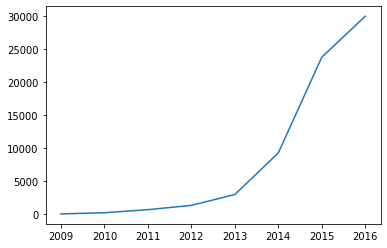

In [170]:
reviews.Year.value_counts().plot()